# Info

This notebook performs data processing to have a dataset which is comfortable to work with


# Imports & Magics

In [1]:
%matplotlib inline
from utils.setup import *

In [2]:
X_train = pd.read_csv(TRAIN_INPUT_RAW)
y_train = pd.read_csv(TRAIN_OUTPUT_RAW)
test = pd.read_csv(TEST_INPUT_RAW)

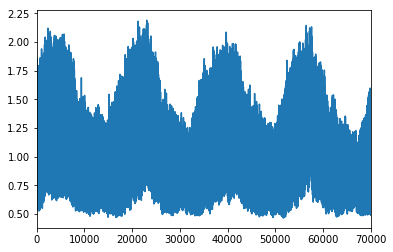

In [3]:
y_train['RES1_BASE'].plot()

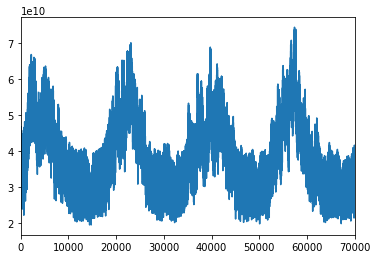

In [4]:
X_train['Injection RTE (W)'].plot()

# Merging

The training data Enedis provides are split in two parts, I prefer to merge them.

In [5]:
X_train.head()

,IDS,Horodate_UTC,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°Celcius),Température normale lissée (°Celcius),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
0,1,13/10/2013 22:00,2013-10-13T00:00:00+02:00,10,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,2924365887,4819516366,20760301211,1181480681,1169604460,11876221,0.0,608873.0,9.6,13.5,302936853.0,19660.0,NaN,9072106039,436423300
1,2,13/10/2013 22:30,2013-10-13T00:30:00+02:00,10,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,2881297990,4765108695,18553188344,1247399186,1235680180,11719006,0.0,608873.0,9.6,13.5,368725682.0,17004.0,NaN,9031111381,407924660
2,3,13/10/2013 23:00,2013-10-13T01:00:00+02:00,10,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,2790724292,4500901592,18187190226,1331017863,1319275090,11742773,0.0,608873.0,9.6,13.5,448572685.0,24299.0,NaN,8949500729,398239990
3,4,13/10/2013 23:30,2013-10-13T01:30:00+02:00,10,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,2653092678,4308193617,18078022135,1435603490,1423884480,11719010,0.0,608873.0,9.5,13.5,550243295.0,23308.0,NaN,8882842849,380571680
4,5,14/10/2013 00:00,2013-10-13T02:00:00+02:00,10,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,2641317515,4166651481,17809803445,1527593647,1515861840,11731807,0.0,608873.0,9.5,13.5,644783673.0,21963.0,NaN,8829957877,367153030


In [6]:
y_train.head()

,IDS,Horodate_UTC,Horodate,Mois,RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
0,1,13/10/2013 22:00,2013-10-13T00:00:00+02:00,10,0.791405,0.698925,NaN,2.780413,0.346364,NaN,NaN
1,2,13/10/2013 22:30,2013-10-13T00:30:00+02:00,10,0.693700,0.722778,NaN,2.301527,0.375439,NaN,NaN
2,3,13/10/2013 23:00,2013-10-13T01:00:00+02:00,10,0.648565,0.678717,NaN,2.361320,0.268125,NaN,NaN
3,4,13/10/2013 23:30,2013-10-13T01:30:00+02:00,10,0.621059,0.668509,NaN,2.567490,0.192953,NaN,NaN
4,5,14/10/2013 00:00,2013-10-13T02:00:00+02:00,10,0.612245,0.700487,NaN,2.563460,0.075701,NaN,NaN


In [7]:
y_train.drop(['Horodate_UTC', 'Horodate', 'Mois'],inplace=True,axis=1)
train = pd.merge(X_train, y_train, on=['IDS', 'IDS'])

# Temperature

Converting temperature from celcius to kelvin to avoid having negative values

In [8]:
train['Température normale lissée (°Celcius)'] = train['Température normale lissée (°Celcius)'].apply(lambda x: x+273.15)
train['Température réalisée lissée (°Celcius)'] = train['Température réalisée lissée (°Celcius)'].apply(lambda x: x+273.15)
train = train.rename(columns={'Température normale lissée (°Celcius)': 'Température normale lissée (°K)', 'Température réalisée lissée (°Celcius)': 'Température réalisée lissée (°K)'})

In [9]:
test['Température normale lissée (°Celcius)'] = test['Température normale lissée (°Celcius)'].apply(lambda x: x+273.15)
test['Température réalisée lissée (°Celcius)'] = test['Température réalisée lissée (°Celcius)'].apply(lambda x: x+273.15)
test = test.rename(columns={'Température normale lissée (°Celcius)': 'Température normale lissée (°K)', 'Température réalisée lissée (°Celcius)': 'Température réalisée lissée (°K)'})

# Horodate

In order to do Time Series, I use Horodate as my dataframe index. I will use the "dd/mm/yyyy hh:mm" date format and use the french timezone for a better understanding of the problem. I drop month and horodate_utc columns as we don't need them.

In [ ]:
train.drop(['Horodate_UTC','Mois'], axis=1, inplace=True)
train['Horodate'] = train['Horodate'].apply(lambda x : pd.to_datetime(date_parser(x).strftime("%d/%m/%Y %H:%M")))
train.set_index('Horodate', drop=True, inplace=True)

In [18]:
test.drop(['Horodate_UTC','Mois'], axis=1, inplace=True)
test['Horodate'] = test['Horodate'].apply(lambda x: pd.to_datetime(date_parser(x).strftime("%d/%m/%Y %H:%M")))
test.set_index('Horodate', drop=True, inplace=True)

# Export

In [19]:
train.head()

,IDS,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°K),Température normale lissée (°K),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W),RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
Horodate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-10-13 00:00:00,1,39784230000,103415000,2849582877,37576289504,8062590100,29513699404,1009515939,2924365887,4819516366,20760301211,1181480681,1169604460,11876221,0.0,608873.0,282.75,286.65,302936853.0,19660.0,NaN,9072106039,436423300,0.791405,0.698925,NaN,2.780413,0.346364,NaN,NaN
2013-10-13 00:30:00,2,37114681000,119543000,2603906116,35230706411,8023402840,27207303571,1007708541,2881297990,4765108695,18553188344,1247399186,1235680180,11719006,0.0,608873.0,282.75,286.65,368725682.0,17004.0,NaN,9031111381,407924660,0.693700,0.722778,NaN,2.301527,0.375439,NaN,NaN
2013-10-13 01:00:00,3,36148675000,136447000,2516689035,34428316838,7982839990,26445476848,966660739,2790724292,4500901592,18187190226,1331017863,1319275090,11742773,0.0,608873.0,282.75,286.65,448572685.0,24299.0,NaN,8949500729,398239990,0.648565,0.678717,NaN,2.361320,0.268125,NaN,NaN
2013-10-13 01:30:00,4,35488831000,164083000,2457628530,33922151279,7953531370,25968619909,929311479,2653092678,4308193617,18078022135,1435603490,1423884480,11719010,0.0,608873.0,282.65,286.65,550243295.0,23308.0,NaN,8882842849,380571680,0.621059,0.668509,NaN,2.567490,0.192953,NaN,NaN
2013-10-13 02:00:00,5,34882911000,191859000,2403762298,33447730318,7922448360,25525281958,907509517,2641317515,4166651481,17809803445,1527593647,1515861840,11731807,0.0,608873.0,282.65,286.65,644783673.0,21963.0,NaN,8829957877,367153030,0.612245,0.700487,NaN,2.563460,0.075701,NaN,NaN


In [20]:
test.head()

,IDS,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation HTA télérelevée à courbe de charge (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),Consommation professionnelle profilée (W),Consommation résidentielle profilée (W),Production décentralisée totale (W),Production décentralisée télérelevée à courbe de charge (W),Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°K),Température normale lissée (°K),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
Horodate,,,,,,,,,,,,,,,,,,,,,,,
2017-01-07 00:00:00,65137,32081381000,1176090000,2272879128,31951824749,9782805832,22169018917,1323202322,3380791887,3835030652,13629994057,3631016811,3616119000,14897811,0,121435,290.15,293.15,2490058667,27667,32,11106008154,311603934
2017-01-07 00:30:00,65138,29070230000,1238080000,2014931240,29144410398,9704610425,19439799973,1286018204,3202230296,3621841748,11329709725,3611579688,3596639333,14940355,0,121435,290.15,293.15,2470877000,27667,33,10990628629,284388050
2017-01-07 01:00:00,65139,28002107000,1297531000,1924960686,28135803907,9566914752,18568889155,1200249286,3087510302,3448981201,10832148366,3628411593,3613541667,14869926,0,121435,290.05,293.15,2482582333,28000,33,10767164038,272223000
2017-01-07 01:30:00,65140,27269022000,1297289000,1863674658,27479471861,9449923546,18029548315,1169260589,2963341742,3252474546,10644471438,3628000702,3613173333,14827369,0,121435,290.05,293.05,2477928333,26333,33,10619184135,256587183
2017-01-07 02:00:00,65141,26728684000,1343579000,1818743827,26994332505,9353217685,17641114820,1120733581,2982278595,3181602803,10356499841,3674870916,3660030333,14840583,0,121435,290.05,293.05,2517481333,28333,34,10473951266,246899584


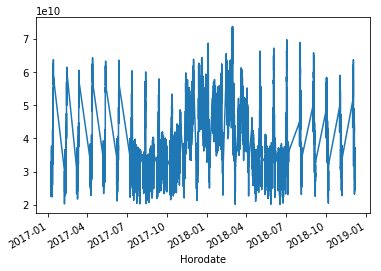

In [21]:
test['Injection RTE (W)'].plot()

In [24]:
train[['RES1_BASE','RES11_BASE']].join(test,how='outer').index

DatetimeIndex(['2013-01-11 00:00:00', '2013-01-11 00:30:00',
               '2013-01-11 01:00:00', '2013-01-11 01:30:00',
               '2013-01-11 02:00:00', '2013-01-11 02:30:00',
               '2013-01-11 03:00:00', '2013-01-11 03:30:00',
               '2013-01-11 04:00:00', '2013-01-11 04:30:00',
               ...
               '2018-12-10 19:00:00', '2018-12-10 19:30:00',
               '2018-12-10 20:00:00', '2018-12-10 20:30:00',
               '2018-12-10 21:00:00', '2018-12-10 21:30:00',
               '2018-12-10 22:00:00', '2018-12-10 22:30:00',
               '2018-12-10 23:00:00', '2018-12-10 23:30:00'],
              dtype='datetime64[ns]', name='Horodate', length=87648, freq=None)

In [29]:
pd.date_range(start='2013-01-11 00:00',end='2018-06-30 23:30',freq="30min")

DatetimeIndex(['2013-01-11 00:00:00', '2013-01-11 00:30:00',
               '2013-01-11 01:00:00', '2013-01-11 01:30:00',
               '2013-01-11 02:00:00', '2013-01-11 02:30:00',
               '2013-01-11 03:00:00', '2013-01-11 03:30:00',
               '2013-01-11 04:00:00', '2013-01-11 04:30:00',
               ...
               '2018-06-30 19:00:00', '2018-06-30 19:30:00',
               '2018-06-30 20:00:00', '2018-06-30 20:30:00',
               '2018-06-30 21:00:00', '2018-06-30 21:30:00',
               '2018-06-30 22:00:00', '2018-06-30 22:30:00',
               '2018-06-30 23:00:00', '2018-06-30 23:30:00'],
              dtype='datetime64[ns]', length=95856, freq='30T')

In [26]:
dt_range = pd.date_range(start='2013-10-13 00:00',end='2018-12-10 23:30',freq="30min")
dt_df = pd.DataFrame(index=dt_range)

In [ ]:
miss = dt_df.join(train.sort_index(), how='outer')

In [12]:
pd.DataFrame.to_csv(train, TRAIN_MERGED)
pd.DataFrame.to_csv(test, TEST_MERGED)